In [0]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib.pyplot import figure
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split
import os
from astropy.convolution import convolve, Box1DKernel

C:\Users\afif0000\AppData\Local\Continuum\anaconda3\envs\PythonCPU\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


Data is cleaned and filtered, index is added for the date and time

In [0]:
import os
os.chdir(r"C:\Users\afif0000\Documents\Machine Learning Course")
 
def parser(x):
	return datetime.strptime(x, '%Y-%m')
df1 = read_csv('temp1.csv',header =0, parse_dates = [['Date', 'Time']],index_col=0,squeeze=True)
df1 = pd.DataFrame(df1)
df1 = df1.iloc[::-1]
df2 = read_csv('weather1.csv',header =0, parse_dates = [['Date', 'Time']],index_col=0,squeeze=True)
df2 = pd.DataFrame(df2)
df2 = df2.iloc[::-1]
df = pd.concat([df1,df2], axis=1)
df = df[df.IR1 != 32]
df = df[df.IR2 != 32]
df = df[df.IR1 != 0]
df = df[df.IR2 != 0]
df = df.query('IR1 < 85')
df = df.query('IR2 < 85')
df = df.query('IR1 > -10')
df = df.query('IR2 > -10')
df

,Temprature,Probe1,Probe2,IR1,IR2,Humidity,Wind Speed,Wind Direction,Air Pressure,Rain Type,Rain Intensity,Rain Event
Date_Time,,,,,,,,,,,,
2020-01-25 00:01:47,35.78,32.22,31.10,35.24,35.06,80,3.584,113,1022.9,0.0,0,0
2020-01-25 00:03:47,35.78,32.18,31.02,35.24,35.06,80,3.808,82,1022.8,0.0,0,0
2020-01-25 00:05:48,35.60,32.18,31.06,35.06,35.06,80,4.032,87,1022.8,0.0,0,0
2020-01-25 00:07:48,35.60,32.13,30.98,35.96,35.06,80,3.360,86,1022.9,0.0,0,0
2020-01-25 00:09:48,35.60,32.18,30.98,35.24,35.06,80,4.704,129,1022.9,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-09 00:06:50,70.34,60.52,49.77,76.82,74.12,38,8.960,32,1016.6,0.0,0,0
2020-04-09 00:06:50,70.34,60.52,49.77,76.82,74.12,38,8.960,32,1016.6,0.0,0,0
2020-04-09 00:08:50,70.34,60.45,49.83,76.82,74.12,38,6.944,27,1016.6,0.0,0,0


#Data Filteration 

The data of the surface road temperature is filtered. 

In [0]:
smoothed_signal_Train = convolve(df.IR1, Box1DKernel(10))
smoothed_signal_Train = pd.DataFrame(smoothed_signal_Train)
#df = np.concatenate(df, smoothed_signal)
smoothed_signal_Train = smoothed_signal_Train.set_index(df.index)
df['IR1'] = smoothed_signal_Train
smoothed_signal_Train1 = convolve(df.IR2, Box1DKernel(10))
smoothed_signal_Train1 = pd.DataFrame(smoothed_signal_Train1)
#df = np.concatenate(df, smoothed_signal)
smoothed_signal_Train1 = smoothed_signal_Train1.set_index(df.index)
df['IR2'] = smoothed_signal_Train1
del df1
del df2
del smoothed_signal_Train
del smoothed_signal_Train1

Check the Data Correlation and Check the Correaltion of each vartiable to check the correlation between each point

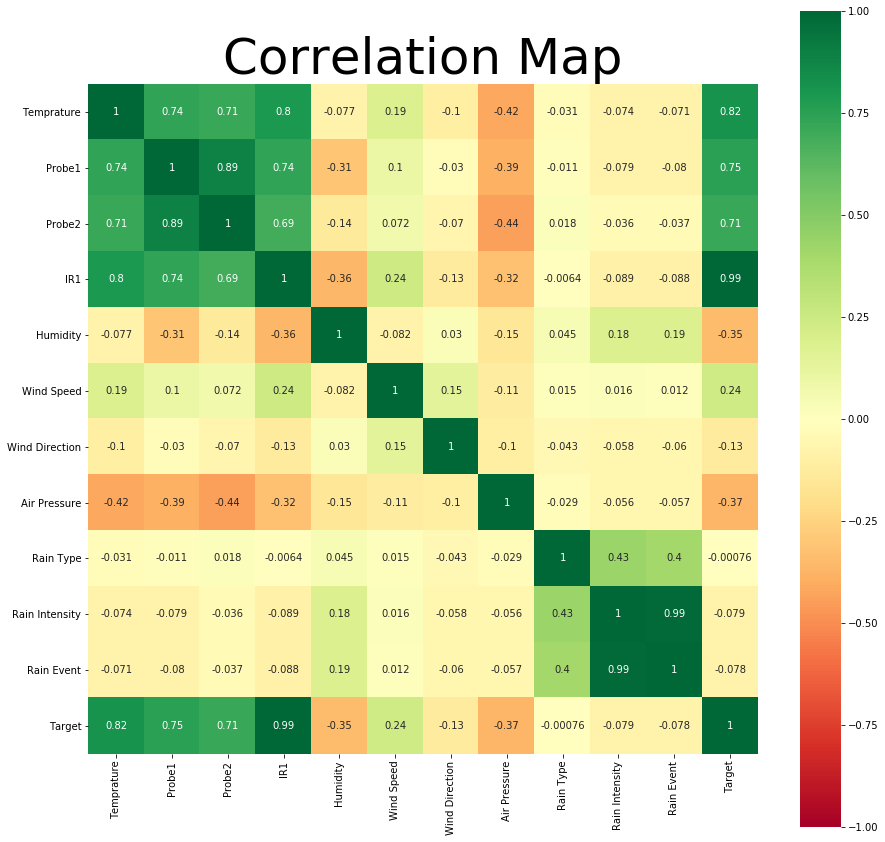

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt
df1 = df
df1 = df1.rename(columns={"IR2": "Target"})
df2 = df1.pop('Target')
df1['Target']=df2
C_mat = df1.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(C_mat,cmap='RdYlGn', vmax = -1,vmin=1, square = True,annot=True)
plt.title('Correlation Map', fontdict = {'fontsize' : 50})
plt.show()

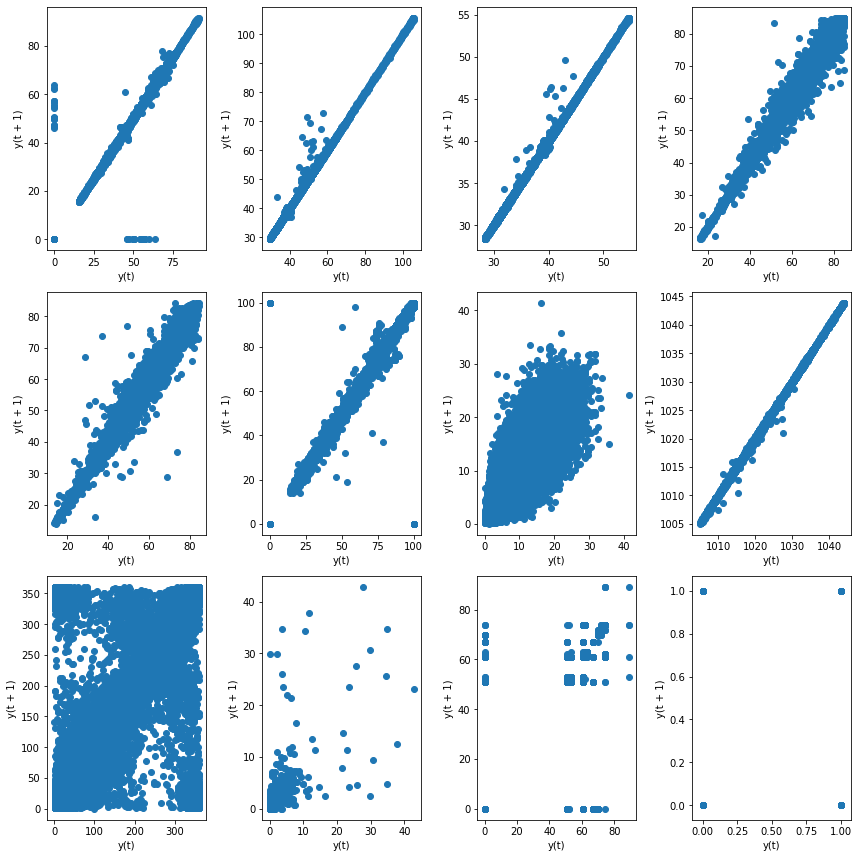

In [0]:
from pandas.plotting import lag_plot
fig = pyplot.figure(figsize=(12,12))
ax1 = fig.add_subplot(3,4,1)
lag_plot(df['Temprature'],ax=ax1)
ax2 = fig.add_subplot(3,4,2)
lag_plot(df['Probe1'],ax=ax2)
ax3 = fig.add_subplot(3,4,3)
lag_plot(df['Probe2'],ax=ax3)
ax4 = fig.add_subplot(3,4,4)
lag_plot(df['IR1'],ax=ax4)
ax5 = fig.add_subplot(3,4,5)
lag_plot(df['IR2'],ax=ax5)
ax6 = fig.add_subplot(3,4,6)
lag_plot(df['Humidity'],ax=ax6)
ax7 = fig.add_subplot(3,4,7)
lag_plot(df['Wind Speed'],ax=ax7)
ax8 = fig.add_subplot(3,4,8)
lag_plot(df['Air Pressure'],ax=ax8)
ax9 = fig.add_subplot(3,4,9)
lag_plot(df['Wind Direction'],ax=ax9)
ax10 = fig.add_subplot(3,4,10)
lag_plot(df['Rain Type'],ax=ax10)
ax11 = fig.add_subplot(3,4,11)
lag_plot(df['Rain Intensity'],ax=ax11)
ax12 = fig.add_subplot(3,4,12)
lag_plot(df['Rain Event'],ax=ax12)
fig.tight_layout(pad=1.0)
pyplot.show()

In [0]:
# First drop the maxtempm and mintempm from the dataframe
df = df.drop(columns=['IR1','Probe1','Probe2']) 
# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'IR2']]
#X = X.drop(columns=['IR1', 'Probe2', 'Probe1'])
#X = X.drop(columns=['Air Pressure','Wind Direction','Rain Intensity','Rain Event','Wind Speed'])
# y will be a pandas series of the meantempm
y = df['IR2']
del df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle = True, stratify = None)

Random Forest Regression Model showed a really good MSE. Results Shown below 

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
print("The mean squared error: %.2f" % sqrt(mean_squared_error(y_test,prediction)))
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))

The mean squared error: 1.27
The Explained Variance: 0.99
The Mean Absolute Error: 0.60 degrees celsius
The Median Absolute Error: 0.22 degrees celsius


The testing data set is compared below with the training model, it shows good prediciton 

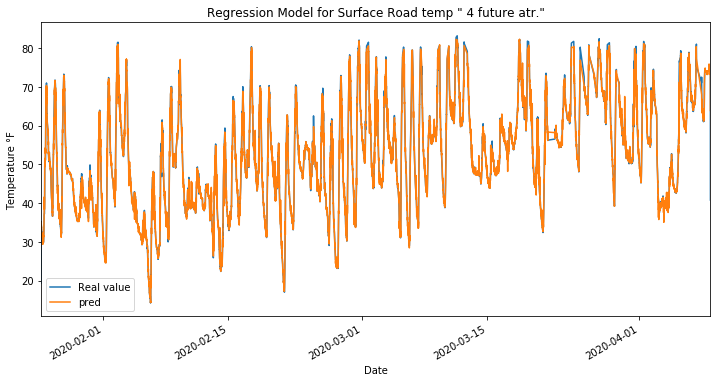

In [0]:
from pandas import DataFrame
prediction = pd.DataFrame(prediction)
prediction = prediction.set_index(y_test.index)
pred = pd.concat([y_test,prediction], axis=1)
pred = pred.rename(columns = {"IR2":"Real value"}) 
pred = pred.rename(columns = {0:"pred"}) 
title='Regression Model for Surface Road temp " 4 future atr."'
ylabel='Temperature °F'
xlabel='Date'
ax = pred.plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## 5 to 6 feburary prediciton
In that set we are checking the model how it will predict the Cold Front that hit Oklahoma Last Feburary. It shows good Predictions

In [0]:
# parse data of weather
def parser(x):
	return datetime.strptime(x, '%Y-%m')
X_test = read_csv('Book12.csv',header =0, parse_dates = [['Date', 'Time']],index_col=0,squeeze=True)
X_test = pd.DataFrame(X_test)
X_test = X_test.iloc[::-1]

In [0]:
# parse predcited Surface temp
def parser(x):
	return datetime.strptime(x, '%Y-%m')
y_test = read_csv('Book11.csv',header =0, parse_dates = [['Date', 'Time']],index_col=0,squeeze=True)
y_test = pd.DataFrame(y_test)
y_test = y_test.iloc[::-1]
y_test = y_test.drop(columns=['IR1','Probe1','Probe2','Temprature']) 
from astropy.convolution import convolve, Box1DKernel
smoothed_signal_Train1 = convolve(y_test.IR2, Box1DKernel(10))
smoothed_signal_Train1 = pd.DataFrame(smoothed_signal_Train1)
#df = np.concatenate(df, smoothed_signal)
smoothed_signal_Train1 = smoothed_signal_Train1.set_index(y_test.index)
y_test['IR2'] = smoothed_signal_Train1

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
print("The mean squared error: %.2f" % sqrt(mean_squared_error(y_test,prediction)))
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))

The mean squared error: 1.04
The Explained Variance: 0.95
The Mean Absolute Error: 0.39 degrees celsius
The Median Absolute Error: 0.13 degrees celsius


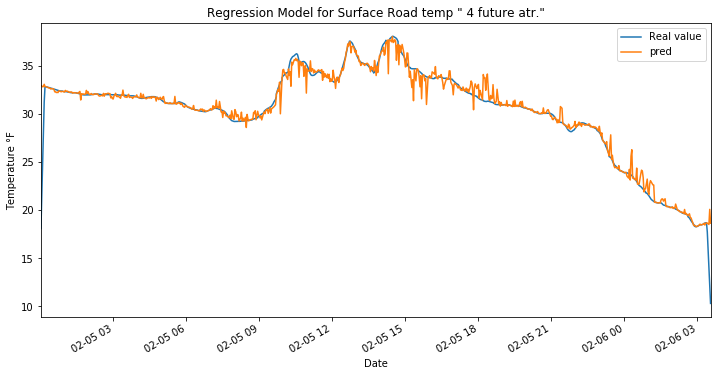

In [0]:
from pandas import DataFrame
prediction = pd.DataFrame(prediction)
prediction = prediction.set_index(y_test.index)
pred = pd.concat([y_test,prediction], axis=1)
pred = pred.rename(columns = {"IR2":"Real value"}) 
pred = pred.rename(columns = {0:"pred"}) 
title='Regression Model for Surface Road temp " 4 future atr."'
ylabel='Temperature °F'
xlabel='Date'
ax = pred.plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

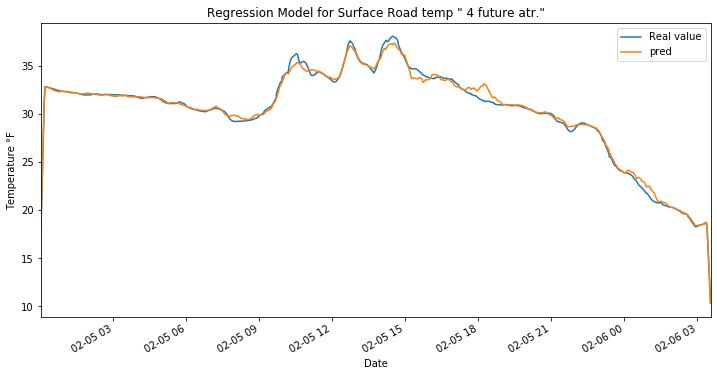

In [0]:
smoothed_signal_Train1 = convolve(prediction[0], Box1DKernel(10))
smoothed_signal_Train1 = pd.DataFrame(smoothed_signal_Train1)
smoothed_signal_Train1 = smoothed_signal_Train1.set_index(y_test.index)
prediction[0] = smoothed_signal_Train1
prediction = pd.DataFrame(prediction)
prediction = prediction.set_index(y_test.index)
pred = pd.concat([y_test,prediction], axis=1)
pred = pred.rename(columns = {"IR2":"Real value"}) 
pred = pred.rename(columns = {0:"pred"}) 
title='Regression Model for Surface Road temp " 4 future atr."'
ylabel='Temperature °F'
xlabel='Date'
ax = pred.plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

#Test the online data

The online data that is processed through the online API from the weather service is also tested by the model. 

**I uploaded another Notebook explains how the weather data is parsed from the online API** 

In [0]:
def parser(x):
	return datetime.strptime(x, '%Y-%m')
X_test = read_csv('SERVER_TEST.csv',header =0, parse_dates = [['Date', 'Time']],index_col=0,squeeze=True)
X_test = pd.DataFrame(X_test)
X_test = X_test.iloc[::-1]

In [0]:
def parser(x):
	return datetime.strptime(x, '%Y-%m')
y_test = read_csv('IR_test.csv',header =0, parse_dates = [['Date', 'Time']],index_col=0,squeeze=True)
y_test = pd.DataFrame(y_test)
y_test = y_test.iloc[::-1]
#y_test = y_test.drop(columns=['IR1','Probe1','Probe2','Temprature']) 
from astropy.convolution import convolve, Box1DKernel
smoothed_signal_Train1 = convolve(y_test.IR2, Box1DKernel(10))
smoothed_signal_Train1 = pd.DataFrame(smoothed_signal_Train1)
#df = np.concatenate(df, smoothed_signal)
smoothed_signal_Train1 = smoothed_signal_Train1.set_index(y_test.index)
y_test['IR2'] = smoothed_signal_Train1

In [0]:
#Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
prediction = regressor.predict(X_test)
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
print("The mean squared error: %.2f" % sqrt(mean_squared_error(y_test,prediction)))
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, prediction))

The mean squared error: 8.01
The Explained Variance: 0.41
The Mean Absolute Error: 5.80 degrees celsius
The Median Absolute Error: 3.64 degrees celsius


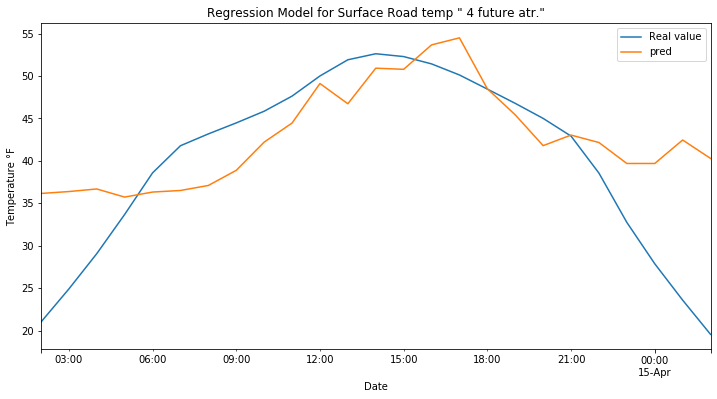

In [0]:
from pandas import DataFrame
prediction = pd.DataFrame(prediction)
prediction = prediction.set_index(y_test.index)
pred = pd.concat([y_test,prediction], axis=1)
pred = pred.rename(columns = {"IR2":"Real value"}) 
pred = pred.rename(columns = {0:"pred"}) 
title='Regression Model for Surface Road temp " 4 future atr."'
ylabel='Temperature °F'
xlabel='Date'
ax = pred.plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);



**Data is smoothed again by the convolve filter and showed a good prediction**

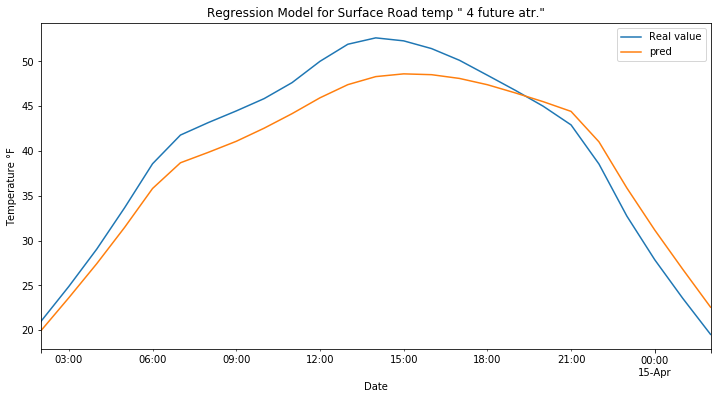

In [0]:
smoothed_signal_Train1 = convolve(prediction[0], Box1DKernel(10))
smoothed_signal_Train1 = pd.DataFrame(smoothed_signal_Train1)
smoothed_signal_Train1 = smoothed_signal_Train1.set_index(y_test.index)
prediction[0] = smoothed_signal_Train1
prediction = pd.DataFrame(prediction)
prediction = prediction.set_index(y_test.index)
# plot
pred = pd.concat([y_test,prediction], axis=1)
pred = pred.rename(columns = {"IR2":"Real value"}) 
pred = pred.rename(columns = {0:"pred"}) 
title='Regression Model for Surface Road temp " 4 future atr."'
ylabel='Temperature °F'
xlabel='Date'
ax = pred.plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [0]:
print("The mean squared error: %.2f" % sqrt(mean_squared_error(y_test,prediction)))

The mean squared error: 2.86


#deep Learning Model 

As shown belowe the deep regression model that used for the predcition method

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import zscore
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu',activity_regularizer=regularizers.l1(1e-4))) # input 1
model.add(Dense(256, kernel_initializer='normal',activation='relu')) #hidden 1
model.add(Dense(256, kernel_initializer='normal',activation='relu')) #hidden 2
model.add(Dense(256, kernel_initializer='normal',activation='relu')) #hidden 3
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal',activation='linear')) #output
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                                    patience=5, verbose=1, mode='auto', restore_best_weights=True)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               256       
_________________________________________________________________
dense_10 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 165,121
Trainable params: 165,121
Non-trainable params: 0
________________________________________________

In [0]:
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
                        #patience=5, verbose=1, mode='auto', restore_best_weights=True)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)

model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)
prediction = model.predict(X_test)

Train on 39395 samples, validate on 25 samples
Epoch 1/50
39395/39395 [==============================] - 5s 130us/sample - loss: 5.6364 - mean_absolute_error: 5.1149 - val_loss: 8.0131 - val_mean_absolute_error: 7.5625
Epoch 2/50
39395/39395 [==============================] - 4s 110us/sample - loss: 3.9318 - mean_absolute_error: 3.5442 - val_loss: 7.0006 - val_mean_absolute_error: 6.6359
Epoch 3/50
39395/39395 [==============================] - 5s 117us/sample - loss: 3.6477 - mean_absolute_error: 3.3375 - val_loss: 7.6323 - val_mean_absolute_error: 7.3362
Epoch 4/50
39395/39395 [==============================] - 5s 116us/sample - loss: 3.5215 - mean_absolute_error: 3.2756 - val_loss: 5.7255 - val_mean_absolute_error: 5.4839
Epoch 5/50
39395/39395 [==============================] - 4s 104us/sample - loss: 3.4394 - mean_absolute_error: 3.2412 - val_loss: 6.0015 - val_mean_absolute_error: 5.8015
Epoch 6/50
39395/39395 [==============================] - 4s 104us/sample - loss: 3.2594 - me

In [0]:
prediction = pd.DataFrame(prediction)
y_test = pd.DataFrame(y_test)


Shwon below the predction graph for one day using the DNN model

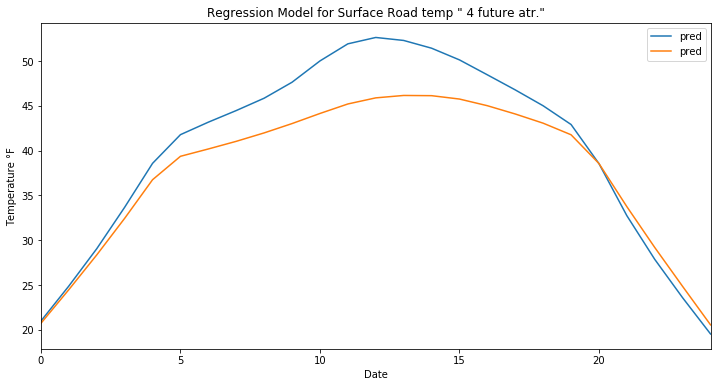

In [0]:
smoothed_signal_Train1 = convolve(prediction[0], Box1DKernel(10))
smoothed_signal_Train1 = pd.DataFrame(smoothed_signal_Train1)
smoothed_signal_Train1 = smoothed_signal_Train1.set_index(y_test.index)
prediction[0] = smoothed_signal_Train1
prediction = pd.DataFrame(prediction)
prediction = prediction.set_index(y_test.index)
# plot
pred = pd.concat([y_test,prediction], axis=1)
pred = pred.rename(columns = {"IR2":"Real value"}) 
pred = pred.rename(columns = {0:"pred"}) 
title='Regression Model for Surface Road temp " 4 future atr."'
ylabel='Temperature °F'
xlabel='Date'
ax = pred.plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [0]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt
print("The mean squared error: %.2f" % sqrt(mean_squared_error(y_test,prediction)))

The mean squared error: 3.51
